In [1]:
image_path = './img/image.jpg'

C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  plt.tight_layout()
C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 48376 (\N{HANGUL SYLLABLE BON}) missing from current font.
  plt.tight_layout()
C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  plt.tight_layout()
C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 48120 (\N{HANGUL SYLLABLE MI}) missing from current font.
  plt.tight_layout()
C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  plt.tight_layout()
C:\Users\parkm\AppData\Local\Temp\ipykernel_8088\1143210829.py:88: UserWarning: Glyph 54589 (\N{HANGUL SYLLABLE PIG}) missing from current font.
  plt.tight_layout()
C:\User

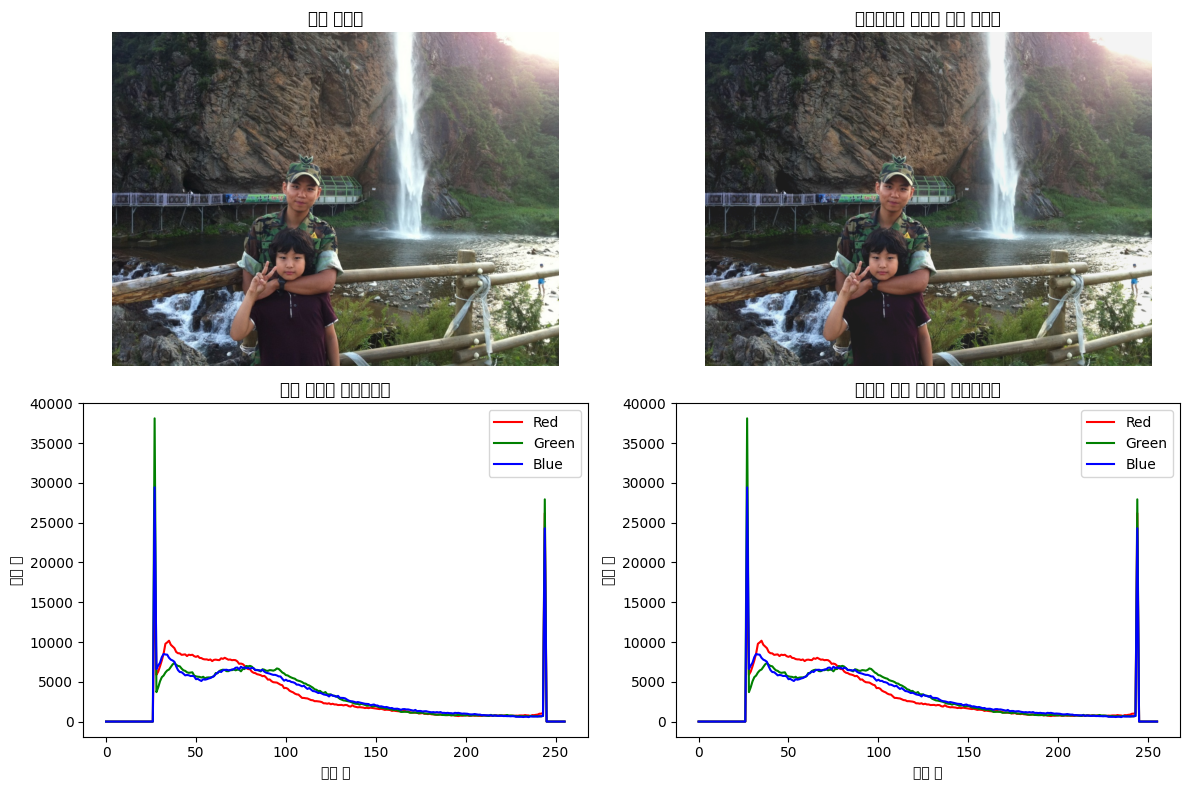

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def clip_histogram(image, clip_percent):
    # 이미지를 RGB 형태로 변환
    b, g, r = cv2.split(image)

    # 히스토그램 계산
    hist_r = cv2.calcHist([r], [0], None, [256], [0, 256])
    hist_g = cv2.calcHist([g], [0], None, [256], [0, 256])
    hist_b = cv2.calcHist([b], [0], None, [256], [0, 256])

    # 클리핑 값 계산
    total_pixels = image.shape[0] * image.shape[1]
    clipped_pixels = int(total_pixels * clip_percent)
    min_clip = None
    max_clip = None

    cumulative_pixels = 0
    for i in range(256):
        cumulative_pixels += hist_r[i] + hist_g[i] + hist_b[i]
        if cumulative_pixels >= clipped_pixels:
            min_clip = i
            break

    cumulative_pixels = 0
    for i in range(255, -1, -1):
        cumulative_pixels += hist_r[i] + hist_g[i] + hist_b[i]
        if cumulative_pixels >= clipped_pixels:
            max_clip = i
            break

    # 히스토그램 클리핑 적용
    r = np.clip(r, min_clip, max_clip)
    g = np.clip(g, min_clip, max_clip)
    b = np.clip(b, min_clip, max_clip)

    # 클리핑 적용된 채널을 합쳐서 새로운 이미지 생성
    clipped_image = cv2.merge((b, g, r))

    return clipped_image

image = cv2.imread(image_path)

clip_percent = 0.1  # 상위 1%의 빈도를 클리핑

clipped_image = clip_histogram(image, clip_percent)

# 히스토그램 계산
hist_r = cv2.calcHist([clipped_image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([clipped_image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([clipped_image], [2], None, [256], [0, 256])

# Matplotlib를 사용하여 이미지 및 히스토그램 비교 및 표시
plt.figure(figsize=(12, 8))

# 원본 이미지와 히스토그램
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("원본 이미지")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.title("원본 이미지 히스토그램")
plt.xlabel("픽셀 값")
plt.ylabel("빈도 수")
plt.legend()

# 클리핑 적용된 이미지와 히스토그램
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(clipped_image, cv2.COLOR_BGR2RGB))
plt.title("히스토그램 클리핑 적용 이미지")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.plot(hist_r, color='red', label='Red')
plt.plot(hist_g, color='green', label='Green')
plt.plot(hist_b, color='blue', label='Blue')
plt.title("클리핑 적용 이미지 히스토그램")
plt.xlabel("픽셀 값")
plt.ylabel("빈도 수")
plt.legend()

plt.tight_layout()
plt.show()
